In [2]:
import numpy as np
import matplotlib.pyplot as mp
import matplotlib.animation as anim
import numpy.random as rd
from jupyterthemes import jtplot

jtplot.style()
mp.rcParams["text.usetex"] = True
mp.rcParams["figure.figsize"] = (7,7)

In [3]:
class PolymerChain:
    
    def __init__(self, N, maxiters):
        rd.seed(31415)
        self.polymer = np.zeros((N,2), int)
        self.direction = np.zeros((3,2), int)
        for i in range(N):
            self.polymer[i,0] = i - N//2
        self.polymer[:,1] = 0
        self.head = N-1
        self.tail = 0
        self.incr = 1
        self.N = N
        self.maxiters = maxiters
            
    def choice(self):
        head = self.head
        hm = (self.head - self.incr + self.N)%self.N
        self.direction[0,0] = self.polymer[head,0] - self.polymer[hm,0]
        self.direction[0,1] = self.polymer[head,1] - self.polymer[hm,1]
        self.direction[1,0] = self.direction[0,1]
        self.direction[1,1] = self.direction[0,0]
        self.direction[2,0] = -self.direction[1,0]
        self.direction[2,1] = -self.direction[1,1]
        r = rd.randint(3)
        return self.direction[r]
    
    def intersection(self,c):
        if (self.polymer[self.head,0]+1 in self.polymer) and \
        (self.polymer[self.head,0]-1 in self.polymer) and \
        (self.polymer[self.head,1]+1 in self.polymer) and \
        (self.polymer[self.head,1]-1 in self.polymer):
            return True
        else:
            return False
            
    def accept(self,c):
        head = self.head
        hp = (self.head + self.incr + self.N)%self.N
        self.polymer[hp,0] = c[0] + self.polymer[head,0]
        self.polymer[hp,1] = c[1] + self.polymer[head,1]
        self.head = hp
        self.tail = (self.head + self.incr + self.N)%self.N
        
    def endtoend(self):
        diff = self.polymer[0] - self.polymer[-1]
        self.dist = np.sqrt(np.sum(diff**2))
        
    def run(self):
        fig = mp.figure()
        ax = fig.add_subplot(111)
        ax.axis("off")
        ax.grid(False)
        #ax.set_xlim(-25,25)
        #ax.set_ylim(-25,25)
        line, = ax.plot(self.polymer[:,0], self.polymer[:,1], "w-", marker="o")
        ax.relim()
        ax.autoscale_view(True,True,True)
        
        def init():
            line.set_ydata([np.nan]*len(self.polymer))
            ax.relim()
            ax.autoscale_view(True,True,True)
            return line,
        
        def animate(i):
            c = self.choice()
            if self.intersection(c):
                self.head = self.tail
                self.incr *= -1
                self.tail = (self.head + self.incr + self.N)%self.N
            else:
                self.accept(c)
                
            line.set_xdata(self.polymer[:,0])
            line.set_ydata(self.polymer[:,1])
            ax.relim()
            ax.autoscale_view(True,True,True)
            return line,
        
        ani = anim.FuncAnimation(fig, animate, self.maxiters, interval=60, blit=True, init_func=init)
        ani.save("polymerchains.mp4", writer="ffmpeg", fps=15)
        mp.show()

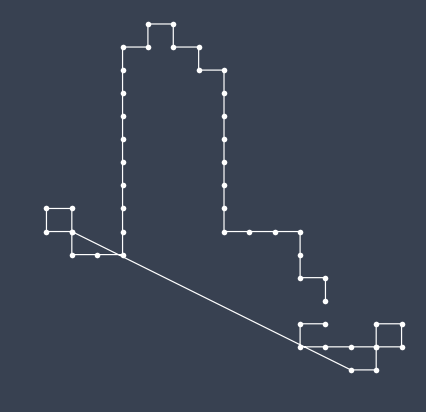

In [4]:
sim = PolymerChain(50,500)
sim.run()